# Part 1: Convolutional Neural Network

###  Importing packages

In [23]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
import timeit

import warnings
warnings.filterwarnings('ignore')

In [24]:
from tensorflow.keras.utils import to_categorical

### Preparing Dataset

In [25]:
batch_size = 64
num_classes = 10
epochs = 50

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
y_train = to_categorical(y_train, num_classes)
y_test =to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Building a Model

In [26]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 16)          0         
                                                                 
 flatten_2 (Flatten)         (None, 400)              

### Model Training

In [27]:
from tensorflow import keras
from tensorflow.keras import layers

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 7s 7ms/step - loss: 0.4081 - accuracy: 0.8703 - val_loss: 0.0829 - val_accuracy: 0.9731
Epoch 2/50
938/938 [==============================] - 7s 7ms/step - loss: 0.1499 - accuracy: 0.9544 - val_loss: 0.0576 - val_accuracy: 0.9810
Epoch 3/50
938/938 [==============================] - 6s 7ms/step - loss: 0.1184 - accuracy: 0.9632 - val_loss: 0.0450 - val_accuracy: 0.9840
Epoch 4/50
938/938 [==============================] - 6s 7ms/step - loss: 0.1021 - accuracy: 0.9698 - val_loss: 0.0365 - val_accuracy: 0.9879
Epoch 5/50
938/938 [==============================] - 6s 7ms/step - loss: 0.0893 - accuracy: 0.9726 - val_loss: 0.0338 - val_accuracy: 0.9887
Epoch 6/50
938/938 [==============================] - 6s 7ms/step - loss: 0.0810 - accuracy: 0.9760 - val_loss: 0.0312 - val_accuracy: 0.9906
Epoch 7/50
938/938 [==============================] - 6s 7ms/step - loss: 0.0768 - accuracy: 0.9765 - val_loss: 0.0318 - val_accuracy: 0.9894
Epoch 

### Testing

In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.022164877504110336
Test accuracy: 0.9933000206947327


### Prediction

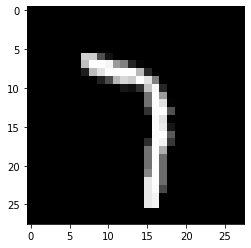

In [29]:
import pylab as plt

plt.imshow(x_test[122].reshape(28,28),cmap='gray')
plt.show()

In [30]:
import numpy as np
li=[0.5, 0,0.4, 0,0,0]
li=np.array(li)
thresholded = (li>=0.5)*1
thresholded 

array([1, 0, 0, 0, 0, 0])

In [31]:
import numpy as np
prediction = model.predict(x_test[122:123])
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1])

Prediction Score:
 [4.4959827e-17 1.3910924e-08 8.7462954e-12 9.3724632e-11 4.6323334e-10
 4.8262169e-14 2.4765285e-20 1.0000000e+00 9.9627287e-15 1.2862011e-09]

Thresholded Score:
 [0 0 0 0 0 0 0 1 0 0]

Predicted Digit:
 [7]


# Part 2: Applications of Convolutional Neural Network

###  MobileNet Models

In [32]:
model = MobileNet(input_shape=None, alpha=0.25, depth_multiplier=1, dropout=1e-3, 
                                 include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

model.summary()

Model: "mobilenet_0.25_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 8)       216       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 8)      32        
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 8)       0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 8)      72        
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 8)      32        
 ation)                                         

###  Classify images

In [35]:
# Write the image name below

img_path = 'download.png'

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:\n', decode_predictions(preds))

Predicted:
 [[('n04372370', 'switch', 0.08513701), ('n04376876', 'syringe', 0.08170768), ('n03937543', 'pill_bottle', 0.072473675), ('n04286575', 'spotlight', 0.06193055), ('n04548280', 'wall_clock', 0.060954913)]]


###  Extract CNN features

In [36]:
features = model.predict(x)
print('\nFeature Shape:\n',features.shape)
print('\nFeatures:\n',features)


Feature Shape:
 (1, 1000)

Features:
 [[8.45947000e-07 3.36881712e-05 3.74933043e-05 5.82506436e-05
  3.58010555e-04 1.30481646e-06 1.19297079e-06 5.43353963e-07
  7.97340022e-07 7.50879735e-07 8.03708957e-08 3.21906015e-07
  5.28705527e-07 5.26068288e-06 4.23359688e-06 5.13450118e-07
  1.13920839e-06 7.28586599e-07 1.18359048e-05 1.99680812e-06
  2.22620724e-06 8.47011324e-06 6.69349492e-06 1.69132927e-05
  2.88863475e-06 1.93076474e-07 9.55915584e-06 1.22065630e-05
  6.92152298e-06 9.09219398e-06 2.12008757e-07 2.30802721e-06
  5.01166369e-07 5.93039829e-07 1.14026693e-06 2.89345439e-06
  1.54929894e-05 9.54080264e-08 1.02650365e-05 3.32314187e-07
  1.11215127e-06 2.47342456e-07 1.20754251e-07 2.30538163e-07
  7.79244090e-07 8.50762802e-08 5.35873414e-06 1.64435073e-06
  1.74112049e-08 5.69942722e-06 2.72256566e-05 4.88349860e-06
  2.27028281e-07 9.77943955e-07 2.69297487e-07 2.27126293e-06
  4.70327450e-07 2.41511589e-09 1.23219452e-05 7.85076509e-07
  1.16172828e-06 5.53317125e-09

###  Extract features from an arbitrary intermediate layer

In [37]:
model_minimal = Model(input=model.input, output=model.get_layer('conv_dw_2_relu').output)

conv_dw_2_relu_features = model_minimal.predict(x)
print('Features of conv_dw_2_relu:',conv_dw_2_relu_features.shape)

TypeError: ignored

### You can extract these features and use the base network as a feature extractor for your problems. 

# Part 3: Deep Convolution Layer Visualization

In [38]:
import matplotlib as mp
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.slim as slim
from tensorflow.examples.tutorials.mnist import input_data
import math

ModuleNotFoundError: ignored

### Extract Data

In [ ]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

### Model Building

In [ ]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 784],name="x-in")
true_y = tf.placeholder(tf.float32, [None, 10],name="y-in")
keep_prob = tf.placeholder("float")

x_image = tf.reshape(x,[-1,28,28,1])
hidden_1 = slim.conv2d(x_image,5,[5,5])
pool_1 = slim.max_pool2d(hidden_1,[2,2])
hidden_2 = slim.conv2d(pool_1,5,[5,5])
pool_2 = slim.max_pool2d(hidden_2,[2,2])
hidden_3 = slim.conv2d(pool_2,20,[5,5])
hidden_3 = slim.dropout(hidden_3,keep_prob)
out_y = slim.fully_connected(slim.flatten(hidden_3),10,activation_fn=tf.nn.softmax)

cross_entropy = -tf.reduce_sum(true_y*tf.log(out_y))
correct_prediction = tf.equal(tf.argmax(out_y,1), tf.argmax(true_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

### Training

In [ ]:
batchSize = 50
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for i in range(1001):
    batch = mnist.train.next_batch(batchSize)
    sess.run(train_step, feed_dict={x:batch[0],true_y:batch[1], keep_prob:0.5})
    if i % 100 == 0 and i != 0:
        trainAccuracy = sess.run(accuracy, feed_dict={x:batch[0],true_y:batch[1], keep_prob:1.0})
        print("step %d, training accuracy %g"%(i, trainAccuracy))

### Testing accuracy

In [ ]:
testAccuracy = sess.run(accuracy, feed_dict={x:mnist.test.images,true_y:mnist.test.labels, keep_prob:1.0})
print("test accuracy %g"%(testAccuracy))

### Get activation values and plotting

In [ ]:
def getActivations(layer,stimuli):
    units = sess.run(layer,feed_dict={x:np.reshape(stimuli,[1,784],order='F'),keep_prob:1.0})
    plotNNFilter(units)
    
def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

### Input Image

In [ ]:
imageToUse = mnist.test.images[0]
plt.imshow(np.reshape(imageToUse,[28,28]), interpolation="nearest", cmap="gray")

### Activation in Layer 1

In [ ]:
getActivations(hidden_1,imageToUse)

### Activation in Layer 2

In [ ]:
getActivations(hidden_2,imageToUse)

### Activation in Layer 3

In [ ]:
getActivations(hidden_3,imageToUse)

# Part 4: Design Choices in Convolutional Neural Networks

## Influence of convolution size

### Model with (3 x 3) Convolution

In [ ]:
K.clear_session()
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

### Model with (7 x 7) Convolution

In [ ]:
# Write your code here 

# Use the same model design from the above cell 

## Striding

### Model with (7 x 7) Convolution with 2 Steps

In [ ]:
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(7, 7), strides=2, activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (7, 7), strides=2, activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

## Padding

### Model with (7 x 7) Convolution with Same Padding

In [ ]:
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(7, 7), strides=1, padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (7, 7), strides=1, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

## Pooling

### Model with (3 x 3) Convolution with Pooling (2 x 2) 

In [ ]:
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

### Model with (3 x 3) Convolution with Pooling (3 x 3) 

In [ ]:
# Write your code here 

# Use the same model design from the above cell 

### What are your findings?